In [1]:
# Render our plots inline
%matplotlib inline

#import the pandas library and aliasing as pd
import pandas as pd

#import the matplotlib library and aliasing as plt
import matplotlib.pyplot as plt

#import the numpy library and aliasing as np
import numpy as np

#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
#plt.rcParams['figure.figsize'] = (15, 5)

## Pandas Recap

What we learned last week:
- `pandas.Series`: Column in a DataFrame
- `pandas.DataFrame`: Collection of columns
- Reading a DataFrame from a .csv
- Accessing values, columns, summaries
- Sorting & Plotting

## This week's topics
- More on summery and selecting
- Grouping
- Apply
- Aggregation
- Transforming columns

In [7]:
# Import a table
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')


In [8]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [11]:
# get the info of the data frame
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [10]:
#get the statistics regarding the data
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [12]:
# check the data types
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [13]:
# check the shape of the data frame
users.shape

(943, 4)

In [14]:
# take the column names
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [15]:
# select 'age' column  using . notation
users.age

user_id
1      24
2      53
3      23
4      24
5      33
6      42
7      57
8      36
9      29
10     53
11     39
12     28
13     47
14     45
15     49
16     21
17     30
18     35
19     40
20     42
21     26
22     25
23     30
24     21
25     39
26     49
27     40
28     32
29     41
30      7
       ..
914    44
915    50
916    27
917    22
918    40
919    25
920    30
921    20
922    29
923    21
924    29
925    18
926    49
927    23
928    21
929    44
930    28
931    60
932    58
933    28
934    61
935    42
936    24
937    48
938    38
939    26
940    32
941    20
942    48
943    22
Name: age, Length: 943, dtype: int64

In [16]:
users.occupation

user_id
1         technician
2              other
3             writer
4         technician
5              other
6          executive
7      administrator
8      administrator
9            student
10            lawyer
11             other
12             other
13          educator
14         scientist
15          educator
16     entertainment
17        programmer
18             other
19         librarian
20         homemaker
21            writer
22            writer
23            artist
24            artist
25          engineer
26          engineer
27         librarian
28            writer
29        programmer
30           student
           ...      
914            other
915    entertainment
916         engineer
917          student
918        scientist
919            other
920           artist
921          student
922    administrator
923          student
924            other
925         salesman
926    entertainment
927       programmer
928          student
929        scientist
930  

In [10]:
# select 'occupation' column using [] notation 
users['occupation']

user_id
1         technician
2              other
3             writer
4         technician
5              other
6          executive
7      administrator
8      administrator
9            student
10            lawyer
11             other
12             other
13          educator
14         scientist
15          educator
16     entertainment
17        programmer
18             other
19         librarian
20         homemaker
21            writer
22            writer
23            artist
24            artist
25          engineer
26          engineer
27         librarian
28            writer
29        programmer
30           student
           ...      
914            other
915    entertainment
916         engineer
917          student
918        scientist
919            other
920           artist
921          student
922    administrator
923          student
924            other
925         salesman
926    entertainment
927       programmer
928          student
929        scientist
930  

In [17]:
# get the unique number of 
users.age.nunique()

61

In [36]:
users.nunique()

age            61
gender          2
occupation     21
zip_code      795
dtype: int64

In [34]:
# count the number of each occupation and return then in a increasing order
users.occupation.value_counts(ascending=True)

doctor             7
homemaker          7
none               9
salesman          12
lawyer            12
retired           14
healthcare        16
entertainment     18
marketing         26
technician        27
artist            28
scientist         31
executive         32
writer            45
librarian         51
programmer        66
engineer          67
administrator     79
educator          95
other            105
student          196
Name: occupation, dtype: int64

In [38]:
#select the rows between 5 and 10
users[5:10]

,age,gender,occupation,zip_code
user_id,,,,
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002
10,53,M,lawyer,90703


In [41]:
users[1:6][['age','gender']]

,age,gender
user_id,,
2,53,F
3,23,M
4,24,M
5,33,F
6,42,M


In [43]:
# select the occupation of the users in rows between 5 and 10
users[5:10]['occupation']

user_id
6         executive
7     administrator
8     administrator
9           student
10           lawyer
Name: occupation, dtype: object

In [46]:
# select the occupation and age of the users in rows between 5 and 10
users[['occupation','age']][5:10]

,occupation,age
user_id,,
6,executive,42
7,administrator,57
8,administrator,36
9,student,29
10,lawyer,53


In [16]:
# count the number of female/male users
users.gender.value_counts()

M    670
F    273
Name: gender, dtype: int64

In [17]:
# print the average , min, max age of the users
print('average age:', users.age.mean())
print('max age:', users.age.max())
print('min age:', users.age.min())

average age: 34.05196182396607
max age: 73
min age: 7


In [18]:
# do the above task in a more elegant way
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


### Grouping
We can gain additional insight by grouping our data.

In [58]:
# get the number of female/male users using groupby function
users.groupby('gender').size()

gender
F    273
M    670
dtype: int64

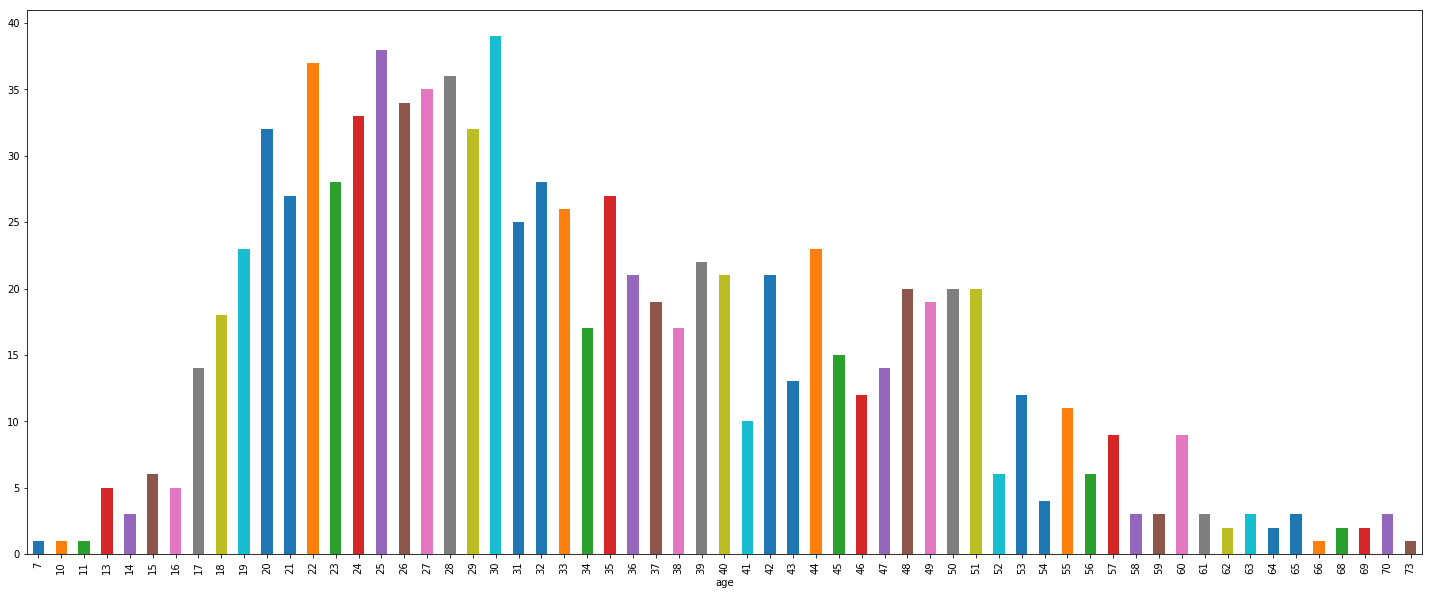

In [73]:
users.groupby('age').size().plot('bar',figsize=(25, 10))

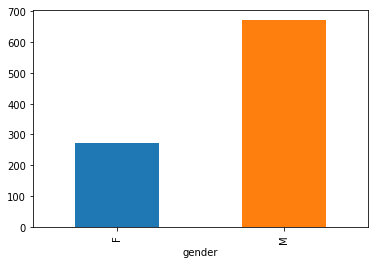

In [65]:
# plot the female/male users using bar chart
users.groupby('gender').size().plot('bar')

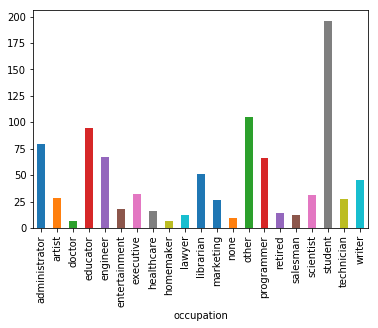

In [66]:
# plot the frequency of each occupation using bar chart
users.groupby('occupation').size().plot('bar')

In [83]:
# get the average age for each occupation
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [92]:
# get the average age per occupation and gender
users.groupby(['gender', 'age']).max()


occupation zip_code
gender age                        
F      13         student    55337
       14         student    53115
       15         student    44212
       16         student    95453
       17         student    61073
       18          writer    98620
       19         student    99687
       20         student    98801
       21         student    94533
       22         student    R3T5K
       23         student    80228
       24         student    90034
       25         student    98006
       26         student    96349
       27          writer    97214
       28         student    98405
       29          writer    V5A2B
       30          writer    97408
       31       scientist    68767
       32          writer    92688
       33        salesman    85710
       34   administrator    52241
       35      programmer    V1G4L
       36          writer    90064
       37          writer    V0R2H
       38      technician    90814
       39           other    59717
       40          writer    92115
       41      healthcare    93555
       42          writer    95660
...                   ...      ...
M      41       scientist    94043
       42          writer    98101
       43           other    98006
       44       scientist    98117
       45       scientist    99709
       46      programmer    M4J2K
       47      technician    Y1A6B
       48          writer    98281
       49          writer    97212
       50          writer    84408
       51          writer    98027
       52          writer    93109
       53      programmer    90703
       54       librarian    99603
       55      technician    94920
       56        salesman    91206
       57         retired    98257
       58       executive    94306
       59   administrator    40205
       60          writer    95076
       61         retired    55125
       62      healthcare    12603
       63      programmer    09645
       64           other    97405
       65         retired    94591
       66        salesman    32605
       68         retired    61455
       69       librarian    98501
       70        engineer    78212
       73         retired    37771

[108 rows x 2 columns]

## Applying functions

In [94]:
# create a function
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# apply the function to the gender column and create a new column
users['gender_n'] = users['gender'].apply(gender_to_numeric)

# get the male percentage per occupation
a = users.groupby('occupation').gender_n.sum() / users.occupation.value_counts() * 100 

# sort to the most male 
a.sort_values()

homemaker         14.285714
healthcare        31.250000
librarian         43.137255
artist            53.571429
administrator     54.430380
none              55.555556
writer            57.777778
marketing         61.538462
other             65.714286
student           69.387755
educator          72.631579
salesman          75.000000
lawyer            83.333333
entertainment     88.888889
scientist         90.322581
executive         90.625000
programmer        90.909091
retired           92.857143
technician        96.296296
engineer          97.014925
doctor           100.000000
dtype: float64

In [25]:
users.head()

,age,gender,occupation,zip_code,gender_n
user_id,,,,,
1,24,M,technician,85711,1
2,53,F,other,94043,0
3,23,M,writer,32067,1
4,24,M,technician,43537,1
5,33,F,other,15213,0


In [26]:
a

administrator     54.430380
artist            53.571429
doctor           100.000000
educator          72.631579
engineer          97.014925
entertainment     88.888889
executive         90.625000
healthcare        31.250000
homemaker         14.285714
lawyer            83.333333
librarian         43.137255
marketing         61.538462
none              55.555556
other             65.714286
programmer        90.909091
retired           92.857143
salesman          75.000000
scientist         90.322581
student           69.387755
technician        96.296296
writer            57.777778
dtype: float64

In [24]:
# check what changed in the data frame
users.head()

,age,gender,occupation,zip_code,gender_n
user_id,,,,,
1,24,M,technician,85711,1
2,53,F,other,94043,0
3,23,M,writer,32067,1
4,24,M,technician,43537,1
5,33,F,other,15213,0


## Aggregation

In [93]:
# Compute the minimum and maximum age per occupation
users.groupby('occupation').age.agg([ 'max','min','mean'])

,max,min,mean
occupation,,,
administrator,70,21,38.746835
artist,48,19,31.392857
doctor,64,28,43.571429
educator,63,23,42.010526
engineer,70,22,36.388060
entertainment,50,15,29.222222
executive,69,22,38.718750
healthcare,62,22,41.562500
homemaker,50,20,32.571429


In [106]:
# create a data frame and apply count to gender per occupation
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
gender_ocup

gender
occupation    gender        
administrator F           36
              M           43
artist        F           13
              M           15
doctor        M            7
educator      F           26
              M           69
engineer      F            2
              M           65
entertainment F            2
              M           16
executive     F            3
              M           29
healthcare    F           11
              M            5
homemaker     F            6
              M            1
lawyer        F            2
              M           10
librarian     F           29
              M           22
marketing     F           10
              M           16
none          F            4
              M            5
other         F           36
              M           69
programmer    F            6
              M           60
retired       F            1
              M           13
salesman      F            3
              M            9
scientist     F            3
              M           28
student       F           60
              M          136
technician    F            1
              M           26
writer        F           19
              M           26

In [96]:
# create a DataFrame and apply count for each occupation
occup_count = users.groupby(['occupation']).agg('count')
occup_count.head()

,age,gender,zip_code,gender_n
occupation,,,,
administrator,79,79,79,79
artist,28,28,28,28
doctor,7,7,7,7
educator,95,95,95,95
engineer,67,67,67,67


In [112]:
# divide the gender_ocup per the occup_count and multiply per 100
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100
occup_gender.head(6)


age      gender  gender_n  zip_code
occupation    gender                                     
administrator F       NaN   45.569620       NaN       NaN
              M       NaN   54.430380       NaN       NaN
artist        F       NaN   46.428571       NaN       NaN
              M       NaN   53.571429       NaN       NaN
doctor        M       NaN  100.000000       NaN       NaN
educator      F       NaN   27.368421       NaN       NaN

In [114]:
# present all rows from the 'gender column'
occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

## Adding and changing variables

In [30]:
# check the shape of users data set
users.shape

(943, 5)

In [128]:
# create a series to add to useres data frame as new column
s = pd.Series(np.array([len(users)]))
type(s)

pandas.core.series.Series

In [129]:
# add the series to the users data frame under the column "newColumn1"
users['newColumn1'] = s
users.head()

,age,gender,occupation,zip_code,gender_n,newColumn1
user_id,,,,,,
1,24,M,technician,85711,1,NaN
2,53,F,other,94043,0,NaN
3,23,M,writer,32067,1,NaN
4,24,M,technician,43537,1,NaN
5,33,F,other,15213,0,NaN


## Merging Data

In [139]:
# create a data frame to merge with useres data frame 
arr = np.array([np.nan]*len(users)*2).reshape(len(users),2)
df = pd.DataFrame(arr,index = users.index, columns=['newColumn2','newColumn3'])
df.head()

,newColumn2,newColumn3
user_id,,
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


In [145]:
# merge the useres data frame with the new data frame
users.merge(df,left_index=True, right_index=True)

,age,gender,occupation,zip_code,gender_n,newColumn1,newColumn2,newColumn3
user_id,,,,,,,,
1,24,M,technician,85711,1,NaN,NaN,NaN
2,53,F,other,94043,0,NaN,NaN,NaN
3,23,M,writer,32067,1,NaN,NaN,NaN
4,24,M,technician,43537,1,NaN,NaN,NaN
5,33,F,other,15213,0,NaN,NaN,NaN
6,42,M,executive,98101,1,NaN,NaN,NaN
7,57,M,administrator,91344,1,NaN,NaN,NaN
8,36,M,administrator,05201,1,NaN,NaN,NaN
9,29,M,student,01002,1,NaN,NaN,NaN
